In [1]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
pip install unsloth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.9/310.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.1/112.1 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not cu

In [3]:
# Also get the latest nightly Unsloth!
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git

Found existing installation: unsloth 2024.11.11
Uninstalling unsloth-2024.11.11:
  Successfully uninstalled unsloth-2024.11.11
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-req-build-l3kbp5vd
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-req-build-l3kbp5vd
  Resolved https://github.com/unslothai/unsloth.git to commit 8558bc92b06f9128499484ef737fa71b966ffc23
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2024.11.10-py3-none-any.whl size=166794 sha256=8f75603783e5f567bb3455c3aa1287834657be8e6a7739050ff965ceba062e0c
  Stored in directory: /tmp/pip-ephem-wheel-cache-zj_2a66s/wheels/ed/d4/e9/76fb290ee3df0a5fc21ce5c2c788e29e9607a2353d8342fd0d
Successfully built unsloth


In [4]:
from datasets import load_dataset
import torch
from transformers import AutoProcessor, TextStreamer
from unsloth import FastLanguageModel, is_bf16_supported
from unsloth.models import FastVisionModel
from peft import LoraConfig
from trl import SFTConfig, SFTTrainer
#from qwen_vl_utils import process_vision_info
from unsloth.trainer import UnslothVisionDataCollator

from PIL import Image
import requests

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [5]:
from huggingface_hub import login
login()

**1. Preparing the dataset**

In [ ]:
prompt = """Create a Short Product description based on the provided ##PRODUCT NAME## and ##CATEGORY## and image.
Only return description. The description should be SEO optimized and for a better mobile search experience.

##PRODUCT NAME##: {product_name}
##CATEGORY##: {category}"""

system_message = "You are an expert product description writer for Amazon e-commerce platform."

def format_data(sample):
  return {"messages": [
      {
          "role": "system",
          "content": [{"type": "text", "text": system_message}],
      },
      {
          "role": "user",
          "content": [
              {
                  "type": "text",
                  "text": prompt.format(product_name=sample["Product Name"], category=sample["Category"]),

              },{
                  "type": "image",
                  "image": sample["image"],
              }
          ],
      },
      {
          "role": "assistant",
          "content": [{"type": "text", "text": sample["description"]}],
      },

  ],

  }

In [ ]:
dataset_id = "philschmid/amazon-product-descriptions-vlm"
dataset = load_dataset(dataset_id, split="train")
dataset = [format_data(sample) for sample in dataset]

README.md:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/47.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1345 [00:00<?, ? examples/s]

In [ ]:
dataset[0]

{'messages': [{'role': 'system',
   'content': [{'type': 'text',
     'text': 'You are an expert product description writer for Amazon e-commerce platform.'}]},
  {'role': 'user',
   'content': [{'type': 'text',
     'text': "Create a Short Product description based on the provided ##PRODUCT NAME## and ##CATEGORY## and image.\nOnly return description. The description should be SEO optimized and for a better mobile search experience.\n\n##PRODUCT NAME##: Kurio Glow Smartwatch for Kids with Bluetooth, Apps, Camera & Games, Blue\n##CATEGORY##: Toys & Games | Kids' Electronics | Electronic Learning Toys"},
    {'type': 'image',
     'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': "Kurio Glow Smartwatch: Fun, Safe & Educational!  This kids' smartwatch boasts Bluetooth connectivity, built-in apps & games, and a camera – all in a vibrant blue design. Perfect for learning & play!  #kidssmartwatch 

**2. Fine-Tuning VLMs using TRL, SFTTrainer, and unsloth**

For this fine-tuning process, we'll be using Unsloth, a powerful library that optimizes LLM fine-tuning.

In [ ]:
model_name = "unsloth/Qwen2-VL-7B-Instruct"

# Initialize the model with Unsloth
model, tokenizer = FastVisionModel.from_pretrained(
    model_name=model_name,
    load_in_4bit=True,
    use_gradient_checkpointing="unsloth",
)

processor = AutoProcessor.from_pretrained(model_name)

model.safetensors:   0%|          | 0.00/5.90G [00:00<?, ?B/s]

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


generation_config.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [ ]:
# Finetuning the attention or the MLP layers by selecting both the vision part and language part of the model
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers=True,
    finetune_language_layers=True,
    finetune_attention_modules=True,
    finetune_mlp_modules=True,
    r=16,
    lora_alpha=16,
    lora_dropout=0,
    bias="none",
    random_state=3407,
    use_rslora=False,
    loftq_config=None
)

In [ ]:
dataset[0]

{'messages': [{'role': 'system',
   'content': [{'type': 'text',
     'text': 'You are an expert product description writer for Amazon e-commerce platform.'}]},
  {'role': 'user',
   'content': [{'type': 'text',
     'text': "Create a Short Product description based on the provided ##PRODUCT NAME## and ##CATEGORY## and image.\nOnly return description. The description should be SEO optimized and for a better mobile search experience.\n\n##PRODUCT NAME##: Kurio Glow Smartwatch for Kids with Bluetooth, Apps, Camera & Games, Blue\n##CATEGORY##: Toys & Games | Kids' Electronics | Electronic Learning Toys"},
    {'type': 'image',
     'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': "Kurio Glow Smartwatch: Fun, Safe & Educational!  This kids' smartwatch boasts Bluetooth connectivity, built-in apps & games, and a camera – all in a vibrant blue design. Perfect for learning & play!  #kidssmartwatch 

In [ ]:
# Before we do any finetuning we can see what the model outputs for the first example!
FastVisionModel.for_inference(model)

# Extract the image and instruction from our dataset
example = dataset[0]
image = example["messages"][1]["content"][1]["image"]
instruction = example["messages"][1]["content"][0]["text"]

# Format the messages according to your dataset structure
messages = [
    {"role": "user", "content": [
        {"type": "image", "image": image},
        {"type": "text", "text": instruction}
    ]}
]

# Apply the chat template for the messages
input_text = tokenizer. apply_chat_template(messages, add_generation_prompt=True)

# Tokenize the input text
inputs = tokenizer(
    images=image,
    text=input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to("cuda")

text_streamer = TextStreamer(tokenizer, skip_prompt=True)

# Generate output using the model
_ = model.generate(
    **inputs,
    streamer=text_streamer,
    max_new_tokens=128,
    use_cache=True,
    temperature=1.5,
    min_p=0.1
)

**3. Train the model**

In [ ]:
FastVisionModel.for_training(model)

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    data_collator=UnslothVisionDataCollator(model, tokenizer),
    train_dataset=dataset,
    args=SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 30,
        # num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 2e-4,
        fp16 = not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",     # For Weights and Biases

        # You MUST put the below items for vision finetuning:
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc = 4,
        max_seq_length = 2048,
    )
)

max_steps is given, it will override any value given in num_train_epochs


In [ ]:
# Show current memory stats
#@title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 1,345 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 30
 "-____-"     Number of trainable parameters = 50,855,936
🦥 Unsloth needs about 1-3 minutes to load everything - please wait!


Step,Training Loss
1,2.666700
2,2.591700
3,2.472900
4,2.556300
5,2.398800
6,2.141000
7,1.785100
8,1.616900
9,1.430500
10,1.242200


**Saving, loading finetuned models**

In [ ]:
model.save_pretrained("Qwen2_VL_7B_Instruct_Finetuned")
tokenizer.save_pretrained("Qwen2_VL_7B_Instruct_Finetuned")

[]

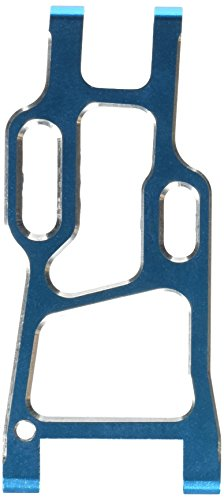

In [ ]:
example = dataset[3]
image = example["messages"][1]["content"][1]["image"]
image

In [ ]:
# Loading the LoRA adapters we just saved for inference, set False to True:

model, tokenizer = FastVisionModel.from_pretrained(
    model_name="Qwen2_VL_7B_Instruct_Finetuned",
    load_in_4bit=True,  # Set to False if you prefer 16-bit
)
FastVisionModel.for_inference(model)

example = dataset[3]
image = example["messages"][1]["content"][1]["image"]
instruction = example["messages"][1]["content"][0]["text"]

# Format the messages according to your dataset structure
messages = [
    {"role": "user", "content": [
        {"type": "image", "image": image},
        {"type": "text", "text": instruction}
    ]}
]

# Apply the chat template for the messages
input_text = tokenizer. apply_chat_template(messages, add_generation_prompt=True)

# Tokenize the input text
inputs = tokenizer(
    images=image,
    text=input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to("cuda")

text_streamer = TextStreamer(tokenizer, skip_prompt=True)

# Generate output using the model
_ = model.generate(
    **inputs,
    streamer=text_streamer,
    max_new_tokens=128,
    use_cache=True,
    temperature=1.5,
    min_p=0.1
)

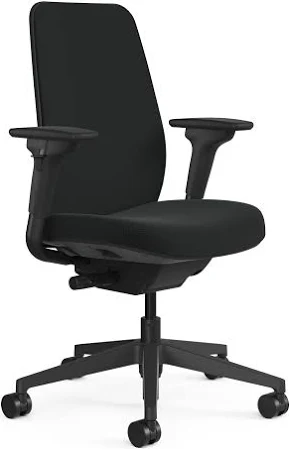

In [6]:
# Example for inference
# Let's use the fine-tuned model to generate a product description based on an image and some product information

# Load an image
image_url = "https://encrypted-tbn2.gstatic.com/shopping?q=tbn:ANd9GcTQ_qXzjL2INrn9jZCzv0gOfUzy3Ua-BaCuucKrdBhCnYI5dbxcAhiI8AwqnNux8aiqeJlMJbJ4AbeiM2za5b8Eh5_EMtInlwG_PGHtrBIRGKkfzQSHFCPi"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [ ]:
# Prepare the input
product_name = "Ergonomic Office"
category = "Furniture"

prompt = f"""Create a Short Product description based on the provided ###PRODUCT NAME# and ##CATEGORY## and image.
Only return description. The description should be SEO optimized and for a better mobile search experience.

##PRODUCT NAME##: {product_name}
##CATEGORY##: {category}
"""

# Format the messages according to your dataset structure
messages = [
    {"role": "user", "content": [
        {"type": "image", "image": image},
        {"type": "text", "text": prompt}
    ]}
]

# Apply the chat template for the messages
input_text = tokenizer. apply_chat_template(messages, add_generation_prompt=True)

# Tokenize the input text
inputs = tokenizer(
    images=image,
    text=input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to("cuda")

text_streamer = TextStreamer(tokenizer, skip_prompt=True)

# Generate output using the model
outputs = model.generate(
    **inputs,
    streamer=text_streamer,
    max_new_tokens=128,
    use_cache=True,
    temperature=1.5,
    min_p=0.1
)

# Decode the output
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Generated Product Description:")
print(generated_text)

In [ ]:
generated_text

'system\nYou are a helpful assistant.\nuser\nCreate a Short Product description based on the provided ###PRODUCT NAME# and ##CATEGORY## and image.\nOnly return description. The description should be SEO optimized and for a better mobile search experience.\n\n##PRODUCT NAME##: Ergonomic Office\n##CATEGORY##: Furniture\n\nassistant\nErgonomic Office Furniture:  Improve your workspace with our selection of comfortable, adjustable office chairs and desks.  Perfect for long hours of work, study, or gaming.  Shop now!'

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# Save our tokenizer and create model card
model.save_pretrained("Qwen2_VL_7B_Instruct_Finetuned")
tokenizer.save_pretrained("Qwen2_VL_7B_Instruct_Finetuned")
trainer. create_model_card()

# Push the results to the hub
trainer.push_to_hub()

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/204M [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.50k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Murasajo/outputs/commit/6a18b5a7f195dfa7dba31c6b920a809dfdf46afc', commit_message='End of training', commit_description='', oid='6a18b5a7f195dfa7dba31c6b920a809dfdf46afc', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Murasajo/outputs', endpoint='https://huggingface.co', repo_type='model', repo_id='Murasajo/outputs'), pr_revision=None, pr_num=None)

In [8]:
from transformers import pipeline

# Initialize the pipeline with your model
generator = pipeline(
    "text-generation",
    model="Murasajo/outputs"
)

# Define product details
product_name = "Ergonomic Office Chair"
category = "Furniture"

# Prepare the prompt
prompt = f"""Create a short product description based on the provided ###PRODUCT NAME# and ##CATEGORY## and image.
Only return description. The description should be SEO optimized and for a better mobile search experience.

##PRODUCT NAME##: {product_name}
##CATEGORY##: {category}
"""

# Simulate your structured dataset with image and text
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image},
            {"type": "text", "text": prompt}
        ]
    }
]

# Call the pipeline
output = generator(messages, max_new_tokens=128, return_full_text=False)[0]

# Extract and print the generated text
print("Generated Product Description:")
print(output["generated_text"])


`low_cpu_mem_usage` was None, now default to True since model is quantized.
The model 'Qwen2VLForConditionalGeneration' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FalconMambaForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'Gemma2ForCausalLM', 'GitForCausalLM', 'GlmForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'GraniteForCausalLM', 'GraniteMoeForCausalLM', 'JambaForCausalLM', 'JetMoeForCausalLM', 'LlamaFor

Generated Product Description:
Introducing the Ergonomic Office Chair, the perfect addition to any workspace. This chair is designed to provide maximum comfort and support, making it the ideal choice for long hours of sitting. With its adjustable height and tilt, you can easily customize the chair to fit your individual needs. The high backrest and lumbar support ensure that your spine is kept in a natural, healthy position, reducing the risk of back pain and strain. The breathable mesh back and plush cushioned seat provide excellent ventilation and comfort, even during the hottest days. The sturdy and durable frame is made of high-quality materials, ensuring that the chair will last for years to
